In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from joblib import dump
from models import eval_model as evm
from models import eval_baseline as evb
from models import cross_validation as cv
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
x_train = np.load('../data/processed/sp_x_train.npy')
y_train  = np.load('../data/processed/sp_y_train.npy' )

x_val = np.load('../data/processed/sp_x_val.npy')
y_val  = np.load('../data/processed/sp_y_val.npy' )

x_test = np.load('../data/processed/sp_x_test.npy')
y_test = np.load('../data/processed/sp_y_test.npy' )

x = np.load('../data/processed/sp_x.npy')
y = np.load('../data/processed/sp_y.npy' )


x_col_name = np.load('../data/processed/sp_x_col_name.npy')
y_col_name = np.load('../data/processed/sp_y_col_name.npy' )

In [3]:
print(np.unique(y_train,return_counts=True))
y_train_dup=y_train+1
print(np.unique(y_train_dup,return_counts=True))
y_train_dup[y_train_dup==2]=0
print(np.unique(y_train_dup,return_counts=True))

(array([0, 1], dtype=int64), array([ 851, 4266], dtype=int64))
(array([1, 2], dtype=int64), array([ 851, 4266], dtype=int64))
(array([0, 1], dtype=int64), array([4266,  851], dtype=int64))


In [4]:
print(np.unique(y_val,return_counts=True))
y_val_dup=y_val+1
print(np.unique(y_val_dup,return_counts=True))
y_val_dup[y_val_dup==2]=0
print(np.unique(y_val_dup,return_counts=True))

(array([0, 1], dtype=int64), array([ 213, 1067], dtype=int64))
(array([1, 2], dtype=int64), array([ 213, 1067], dtype=int64))
(array([0, 1], dtype=int64), array([1067,  213], dtype=int64))


In [5]:
print(np.unique(y_test,return_counts=True))
y_test_dup=y_test+1
print(np.unique(y_test_dup,return_counts=True))
y_test_dup[y_test_dup==2]=0
print(np.unique(y_test_dup,return_counts=True))

(array([0, 1], dtype=int64), array([ 266, 1334], dtype=int64))
(array([1, 2], dtype=int64), array([ 266, 1334], dtype=int64))
(array([0, 1], dtype=int64), array([1334,  266], dtype=int64))


In [124]:
print(np.unique(y,return_counts=True))
y_dup=y+1
print(np.unique(y_dup,return_counts=True))
y_dup[y_dup==2]=0
print(np.unique(y_dup))

(array([0, 1], dtype=int64), array([1330, 6667], dtype=int64))
(array([1, 2], dtype=int64), array([1330, 6667], dtype=int64))
[0 1]


In [6]:
from sklearn.ensemble import RandomForestClassifier

(RandomForestClassifier(random_state=8), 1.0, 0.6546149750738106)

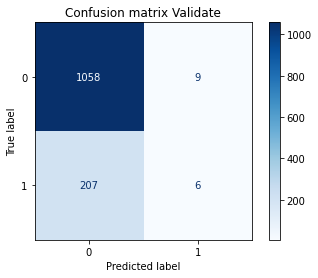

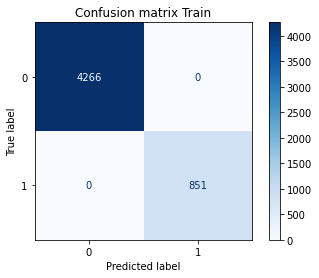

In [88]:
evm.eval_model(RandomForestClassifier(random_state=8 ),x_train,y_train_dup,x_val,y_val_dup,0.8)

True Negative Rate:0.9953139643861293 Validate
True Negative Rate:1.0 Train


(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, random_state=8),
 1.0,
 0.6351382270505256)

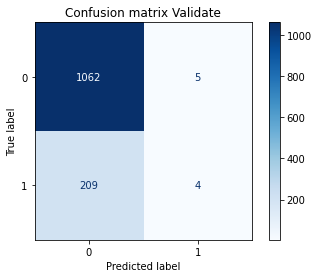

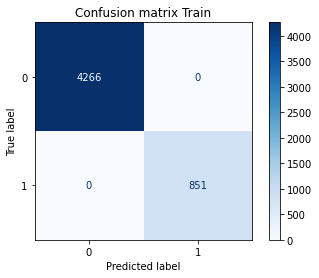

In [8]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17} ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.166308384, 1: 0.833691616},
                        random_state=8),
 1.0,
 0.6334596142930686)

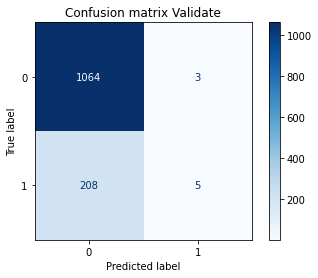

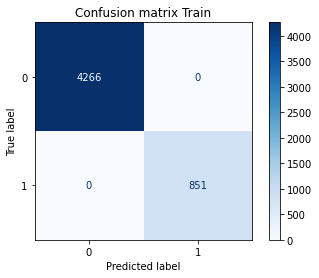

In [133]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:0.833691616,0:0.166308384} ),x_train,y_train_dup,x_val,y_val_dup)

Threshold used:  0.6
Threshold used:  0.6


(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, n_estimators=50,
                        random_state=8),
 1.0,
 0.633745616466685)

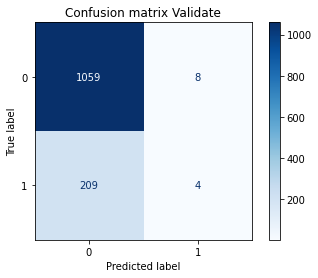

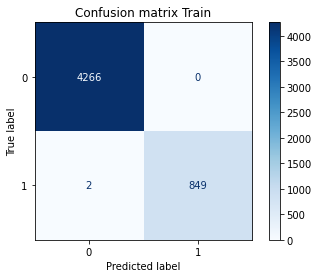

In [107]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17}, n_estimators=50 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, n_estimators=150,
                        random_state=8),
 1.0,
 0.6319636029233822)

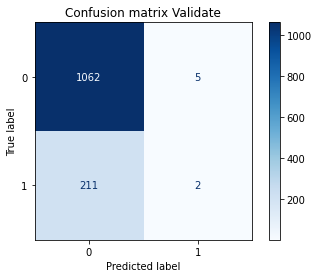

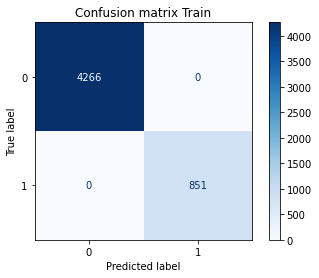

In [21]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17}, n_estimators=150 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, n_estimators=200,
                        random_state=8),
 1.0,
 0.6376792463622724)

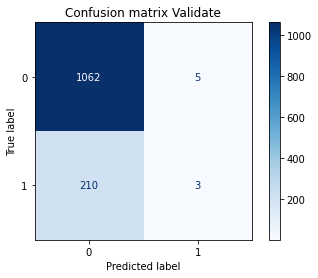

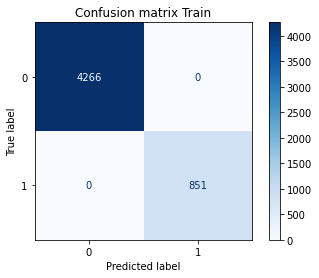

In [22]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17}, n_estimators=200 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        random_state=8),
 0.6955760107934021,
 0.6625086350656265)

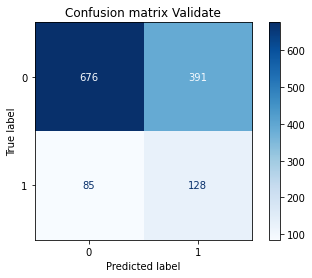

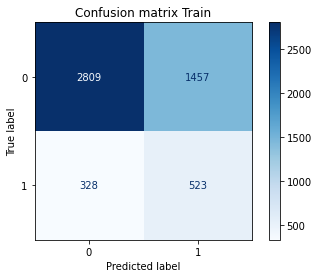

In [23]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=6,
                        random_state=8),
 0.8177552896870455,
 0.6610654240972231)

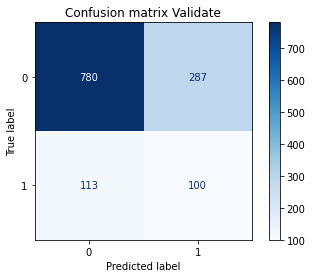

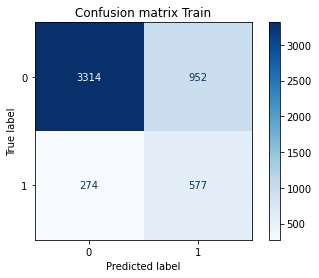

In [24]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=6 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=10,
                        random_state=8),
 0.9821563445669113,
 0.6443276968904963)

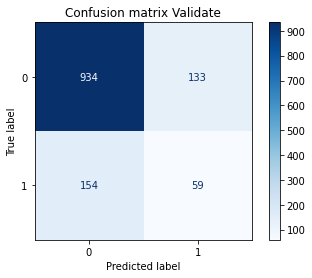

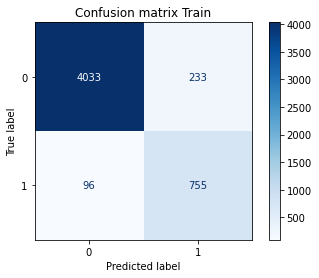

In [25]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=10 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=4,
                        random_state=8),
 0.7328462199128132,
 0.6650914546950557)

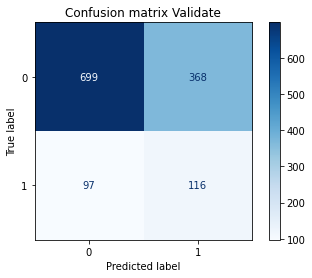

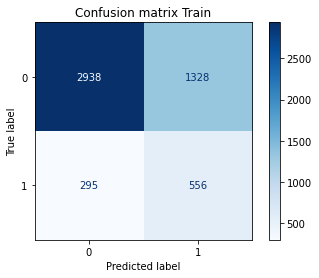

In [26]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=4 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=3,
                        random_state=8),
 0.7086304796816629,
 0.6673178716158243)

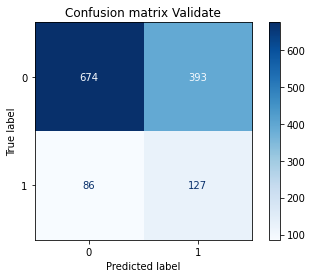

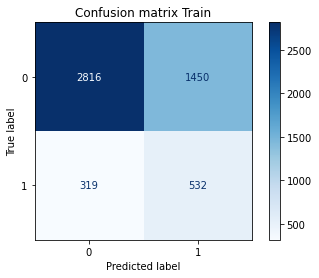

In [27]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=3 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        random_state=8),
 0.6955760107934021,
 0.6625086350656265)

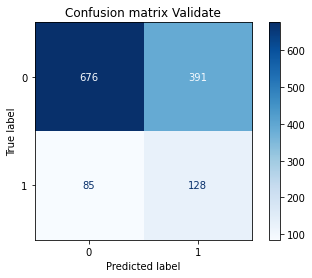

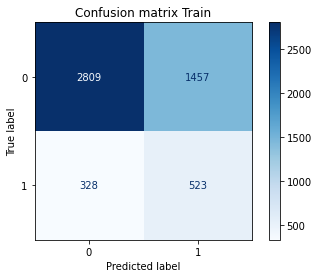

In [30]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        min_samples_leaf=100, random_state=8),
 0.6951519488668636,
 0.6624998349987461)

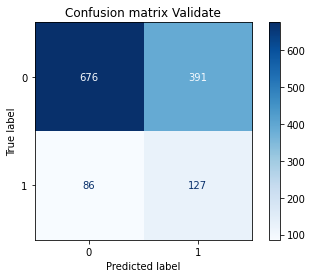

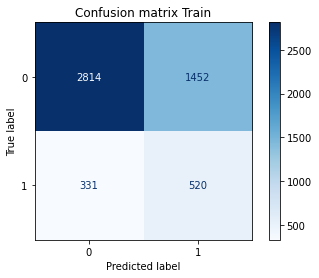

In [32]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, min_samples_leaf=100 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_features='log2', random_state=8),
 0.6955760107934021,
 0.6625086350656265)

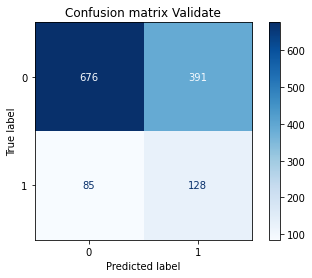

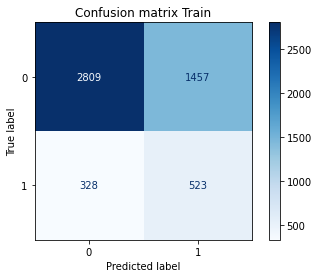

In [33]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, max_features='log2' ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_features=2, random_state=8),
 0.6915272454623033,
 0.6635734431581679)

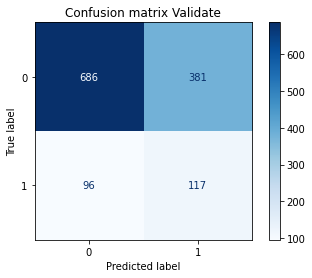

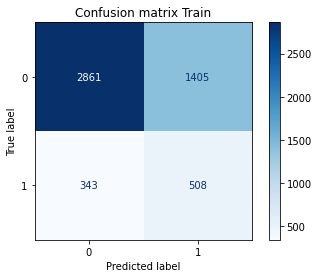

In [34]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, max_features=2 ),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_features=6, random_state=8),
 0.6964373564538672,
 0.6668008676865945)

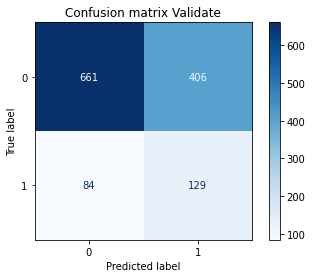

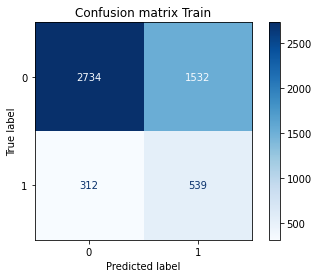

In [35]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, max_features=6),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_features=15, random_state=8),
 0.697031924604847,
 0.6665412657136194)

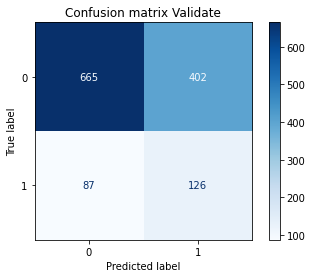

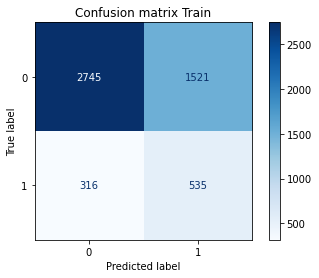

In [37]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, max_features=15),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_features=10, random_state=8),
 0.6971107045405339,
 0.6654544574538767)

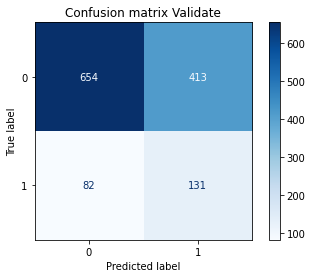

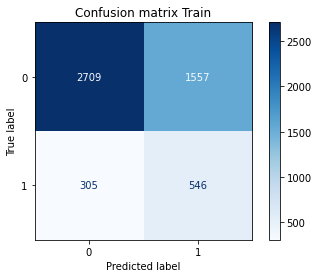

In [38]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2, max_features=10),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_leaf_nodes=5, random_state=8),
 0.6955760107934021,
 0.6625086350656265)

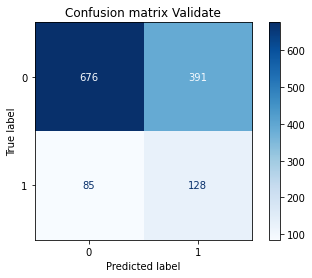

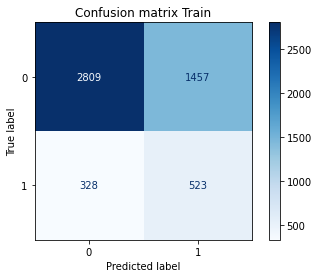

In [39]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2,max_leaf_nodes=5),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        max_leaf_nodes=15, random_state=8),
 0.6955760107934021,
 0.6625086350656265)

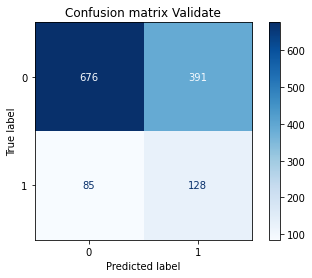

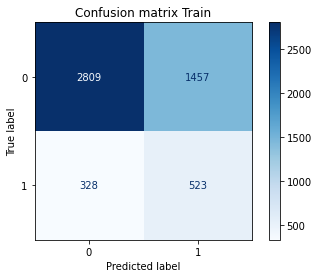

In [40]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2,max_leaf_nodes=15),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        random_state=8),
 0.6955760107934021,
 0.6625086350656265)

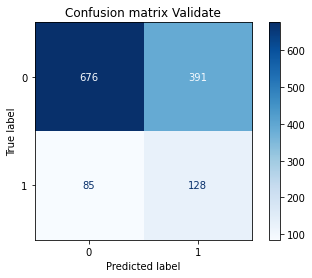

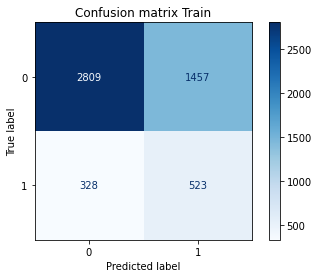

In [41]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2,bootstrap=True),x_train,y_train_dup,x_val,y_val_dup)

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        min_impurity_decrease=0.1, random_state=8),
 0.5,
 0.5)

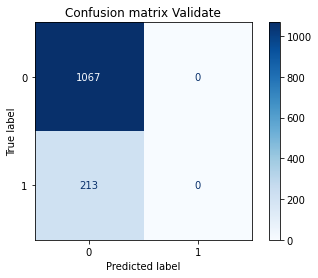

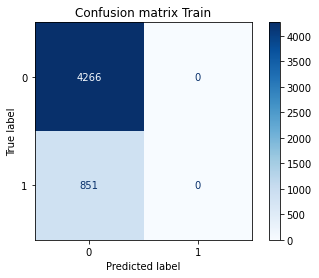

In [42]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2,min_impurity_decrease=0.1),x_train,y_train_dup,x_val,y_val_dup)

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(RandomForestClassifier(class_weight={0: 0.17, 1: 0.84}, max_depth=2,
                        min_impurity_decrease=0.9, random_state=8),
 0.5,
 0.5)

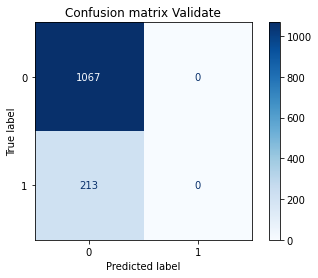

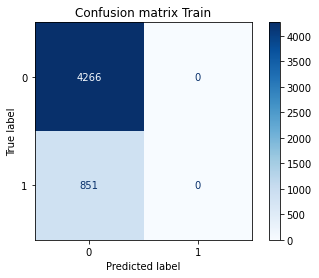

In [43]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={1:.84,0:0.17},max_depth=2,min_impurity_decrease=0.9),x_train,y_train_dup,x_val,y_val_dup)

(RandomForestClassifier(class_weight={0: 1, 1: 8}, max_depth=8, random_state=8),
 0.8999167026134556,
 0.6417096769935452)

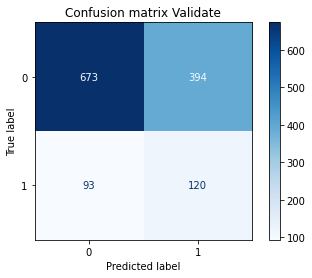

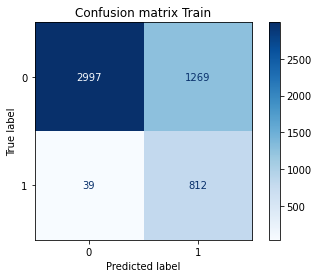

In [85]:
rf_final= RandomForestClassifier(random_state=8,class_weight={1:8,0:1},max_depth=8)
evm.eval_model(rf_final,x_train,y_train_dup,x_val,y_val_dup)

(0.6453356968132474,
 0.175,
 0.28725701943844495,
 0.1677175283732661,
 1.0,
 0.175)

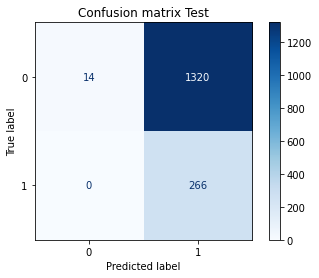

In [64]:
evm.get_performance(rf_final, x_test, y_test_dup, "Test", True)

In [66]:
from sklearn.preprocessing import Normalizer
df=pd.read_csv('../data/raw/test.csv')
df_cleaned = df.drop(['Id_old','Id', '3P Made', '3PA','3P%', 'BLK'], axis=1)
x=df_cleaned.copy()
x = Normalizer().fit_transform(x) 


In [67]:
y_pred=rf_final.predict(x)
y_pred_proba=rf_final.predict_proba(x)

In [68]:
y_pred_proba

array([[0.0514923 , 0.9485077 ],
       [0.05520686, 0.94479314],
       [0.11872058, 0.88127942],
       ...,
       [0.04563572, 0.95436428],
       [0.07789922, 0.92210078],
       [0.04547488, 0.95452512]])

In [70]:
rf_final.classes_

array([0, 1], dtype=int64)

In [73]:
df['TARGET_5Yrs_0'] = y_pred_proba[:,0]
df['TARGET_5Yrs_1'] = y_pred_proba[:,1]
df['TARGET_5Yrs'] = y_pred

In [75]:
df.to_csv('../data/processed/TestResult_RF_Invert.csv',index=False,columns=['Id','TARGET_5Yrs' ,'TARGET_5Yrs_0', 'TARGET_5Yrs_1'])